In [1]:
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.pipeline import make_pipeline

In [22]:
import matplotlib.pyplot as plt

In [25]:
from kneed import KneeLocator

In [7]:
df = pd.read_csv("sample_dataset.csv").iloc[:,0:6]

In [8]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
0,NaN,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,NaN,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,NaN,NaN,NaN,0.13280
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN
565,NaN,28.25,131.20,1261.0,0.09780,0.10340
566,16.60,28.08,108.30,NaN,0.08455,0.10230
567,20.60,29.33,140.10,1265.0,0.11780,0.27700


In [9]:
pipe = make_pipeline(SimpleImputer(), StandardScaler())

In [10]:
df = pipe.fit_transform(df)

In [11]:
df

array([[ 0.00000000e+00, -2.21151229e+00,  1.34955792e+00,
         1.13236903e+00,  1.78551675e+00,  3.53670633e+00],
       [ 2.02210886e+00, -3.81755436e-01,  1.79266920e+00,
         2.21644684e+00,  0.00000000e+00, -2.83595327e-16],
       [ 1.74878595e+00,  4.79889200e-01,  1.66543923e+00,
         1.80616508e+00,  1.04588522e+00,  1.13148366e+00],
       ...,
       [ 7.89049800e-01,  2.17099060e+00,  7.13408054e-01,
         0.00000000e+00, -1.05954319e+00, -4.55836868e-02],
       [ 2.03142669e+00,  2.48048939e+00,  2.10855051e+00,
         2.01297377e+00,  1.73508733e+00,  3.52444521e+00],
       [-1.95660312e+00,  0.00000000e+00, -1.93560772e+00,
        -1.60284266e+00, -3.74238848e+00, -1.24472104e+00]])

In [12]:
pca = PCA()

In [13]:
pca.fit(df)

PCA()

In [14]:
pca.transform(df)

array([[ 2.46412191,  3.38044553, -1.58009218,  1.49142585,  0.76599825,
        -0.94000538],
       [ 2.9438487 , -0.8971783 , -1.57109927, -0.60720338,  0.16450186,
         0.16024074],
       [ 3.38041292,  0.27276546, -0.25442475, -0.34005193,  0.07165603,
         0.10725131],
       ...,
       [ 1.02798022, -1.82896705,  1.48991617,  0.33606842, -0.48419167,
         0.01904935],
       [ 5.3611298 ,  1.08414165,  1.89785292,  0.78631544,  0.26427243,
         0.05252889],
       [-4.01078017, -2.47961045,  0.26963084,  1.73170343,  0.61129861,
        -0.13700538]])

In [16]:
pd.DataFrame(pca.transform(df)).corr()

,0,1,2,3,4,5
0,1.000000e+00,7.782031e-17,7.983499e-17,-2.024160e-16,2.818135e-16,8.431107e-17
1,7.782031e-17,1.000000e+00,6.912545e-16,-6.343569e-16,-5.291595e-16,7.112446e-16
2,7.983499e-17,6.912545e-16,1.000000e+00,4.472142e-17,4.652520e-16,7.907000e-16
3,-2.024160e-16,-6.343569e-16,4.472142e-17,1.000000e+00,-5.315510e-16,-4.123700e-16
4,2.818135e-16,-5.291595e-16,4.652520e-16,-5.315510e-16,1.000000e+00,6.867862e-16
5,8.431107e-17,7.112446e-16,7.907000e-16,-4.123700e-16,6.867862e-16,1.000000e+00


In [17]:
pca.explained_variance_ratio_

array([0.52406292, 0.20481236, 0.14043389, 0.06811377, 0.0429411 ,
       0.01963597])

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.52406292, 0.72887528, 0.86930916, 0.93742294, 0.98036403,
       1.        ])

In [18]:
pca2 = PCA(n_components=3)
pca2.fit_transform(df)

array([[ 2.46412191,  3.38044553, -1.58009218],
       [ 2.9438487 , -0.8971783 , -1.57109927],
       [ 3.38041292,  0.27276546, -0.25442475],
       ...,
       [ 1.02798022, -1.82896705,  1.48991617],
       [ 5.3611298 ,  1.08414165,  1.89785292],
       [-4.01078017, -2.47961045,  0.26963084]])

In [19]:
pca3 = PCA(n_components=0.9)
pca3.fit_transform(df)

array([[ 2.46412191,  3.38044553, -1.58009218,  1.49142585],
       [ 2.9438487 , -0.8971783 , -1.57109927, -0.60720338],
       [ 3.38041292,  0.27276546, -0.25442475, -0.34005193],
       ...,
       [ 1.02798022, -1.82896705,  1.48991617,  0.33606842],
       [ 5.3611298 ,  1.08414165,  1.89785292,  0.78631544],
       [-4.01078017, -2.47961045,  0.26963084,  1.73170343]])

In [21]:
x = range(1,df.shape[1] + 1)
y = pca.explained_variance_ratio_

<BarContainer object of 6 artists>

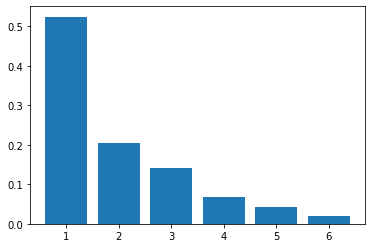

In [23]:
plt.bar(x,y)

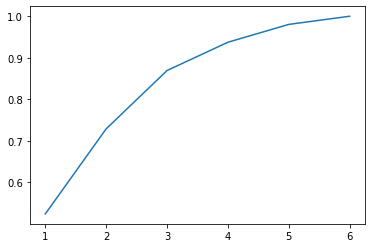

In [24]:
x = range(1,df.shape[1] + 1)
y = pca.explained_variance_ratio_.cumsum()

plt.plot(x,y)

In [26]:
kl = KneeLocator(x,y, curve="concave", direction='increasing', online=True)

In [28]:
list(kl.all_knees)[0]

3

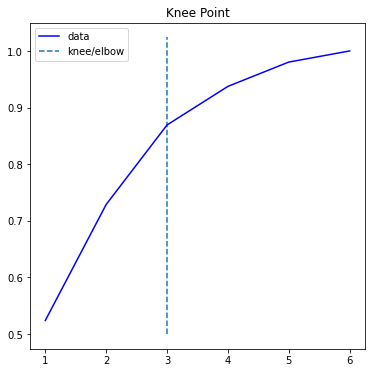

In [29]:
kl.plot_knee()

In [30]:
pca.explained_variance_ratio_.cumsum()[2]

0.8693091639569299

In [31]:
pca_finale = PCA(3)

pca_finale.fit_transform(df)

array([[ 2.46412191,  3.38044553, -1.58009218],
       [ 2.9438487 , -0.8971783 , -1.57109927],
       [ 3.38041292,  0.27276546, -0.25442475],
       ...,
       [ 1.02798022, -1.82896705,  1.48991617],
       [ 5.3611298 ,  1.08414165,  1.89785292],
       [-4.01078017, -2.47961045,  0.26963084]])